## <center>Part3:Solving various terms of __turbulent kinetic energy transport equations__

#### Import Data

In [1]:
clc;clear;close all;
addpath('function','data');
load('import_phy.mat')

#### Calculate 'Mean Field' 'Disturbance Field' 'Reynolds Stress'

In [2]:
[u_avg, v_avg, w_avg,p_avg] = calculateMeanVelocity(Up, Vp, Wp,P);
[u_turb, v_turb, w_turb,p_turb] = calculateTurbulentFluctuations(Up, Vp, Wp, P,u_avg, v_avg, w_avg,p_avg);
[rey_uu, rey_uv, rey_uw, rey_vv, rey_vw, rey_ww] = calculateReynoldsStress(u_turb, v_turb, w_turb);

#### Calculate '$y^+$'

In [3]:
[u_tau, delta_v, Re_tau,y_plus] = calculateWall(u_avg, Y,Rem);

#### Calculate 'Production' 'Pressure Diffusion' 'Turbulence Diffusion' 'Viscous Diffusion' 'Dissipation'

In [4]:
pk = calculatePk(Y,u_avg,rey_uv);
Dkp = calculateDkp(Y,p_turb,v_turb);
Dkt = calculateDkt(Y,u_turb,v_turb,w_turb);
Dkv = calculateDkv(Y,u_turb,v_turb,w_turb);
diss = calculatediss(X,Y,Z,u_turb,v_turb,w_turb);

#### Plot 'Budget term of k'

$P_k(y_j) = - \langle{u'v'}\rangle(y_j)\frac{dU}{dy}(y_j)$  
$D_k^T(y_j) = -\frac{d\langle{k'v'}\rangle}{dy}(y_j)$  
$D_k^P(y_j) = -\frac{d\langle{p'v'}\rangle}{dy}(y_j)$  
$D_k^v(y_j) = \frac{\nu}{2}\frac{d^2\langle{u'u'+v'v'+w'w'}\rangle}{dy^2}(y_j)$  
$\epsilon(y_j) = -\nu\langle{(\frac{\partial u'}{\partial x'})^2+(\frac{\partial u'}{\partial y'})^2+(\frac{\partial u'}{\partial z'})^2+(\frac{\partial v'}{\partial x'})^2+(\frac{\partial v'}{\partial y'})^2+(\frac{\partial v'}{\partial z'})^2+(\frac{\partial w'}{\partial x'})^2+(\frac{\partial w'}{\partial y'})^2+(\frac{\partial w'}{\partial z'})^2}\rangle$



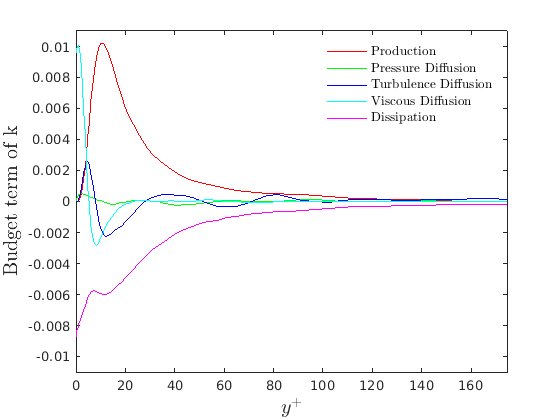

In [5]:
budget_k = {pk,Dkp,Dkt,Dkv,diss};
colors = {'r','g','b','c','m'};
legend = {'Production','Pressure Diffusion','Turbulence Diffusion','Viscous Diffusion','Dissipation'};
outputPath = './photo/part3/Budget term of k.png';
labelsx = '$y^+$';
labelsy = 'Budget term of k';
title = '';
ylims = [-0.011 0.011];
xlims = ([0 max(y_plus)/2]);
plot11(y_plus(1:end-1), budget_k, colors, outputPath, labelsx, labelsy, title, legend, xlims, ylims);